# **Chocolate Sales**

## [**Dataset**](https://drive.google.com/file/d/1wAEhIIiM05KgsMLZNpnTFw2syWgS5wJA/view?usp=sharing)

In [ ]:
!gdown 1wAEhIIiM05KgsMLZNpnTFw2syWgS5wJA

Downloading...
From: https://drive.google.com/uc?id=1wAEhIIiM05KgsMLZNpnTFw2syWgS5wJA
To: /content/Chocolate Sales.csv
100% 67.5k/67.5k [00:00<00:00, 61.4MB/s]


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Chocolate Sales.csv')

In [16]:
# Show dataset
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [17]:
# Info dataset
print(df.info(),'\n')
print(df.describe(), '\n')

# Check missing values
print(df.isnull().sum(),'\n')

# Check duplicate
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None 

       Boxes Shipped
count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000 

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64 

0


In [31]:
# Clean the 'Amount' column: remove '$' and ',' and convert to numeric
df['Amount'] = df['Amount'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Sum the 'Amount' column
total_amount = df['Amount'].sum()

# Print the total amount
print(f"The total amount is: ${total_amount:,.2f}")

The total amount is: $6,183,625.00


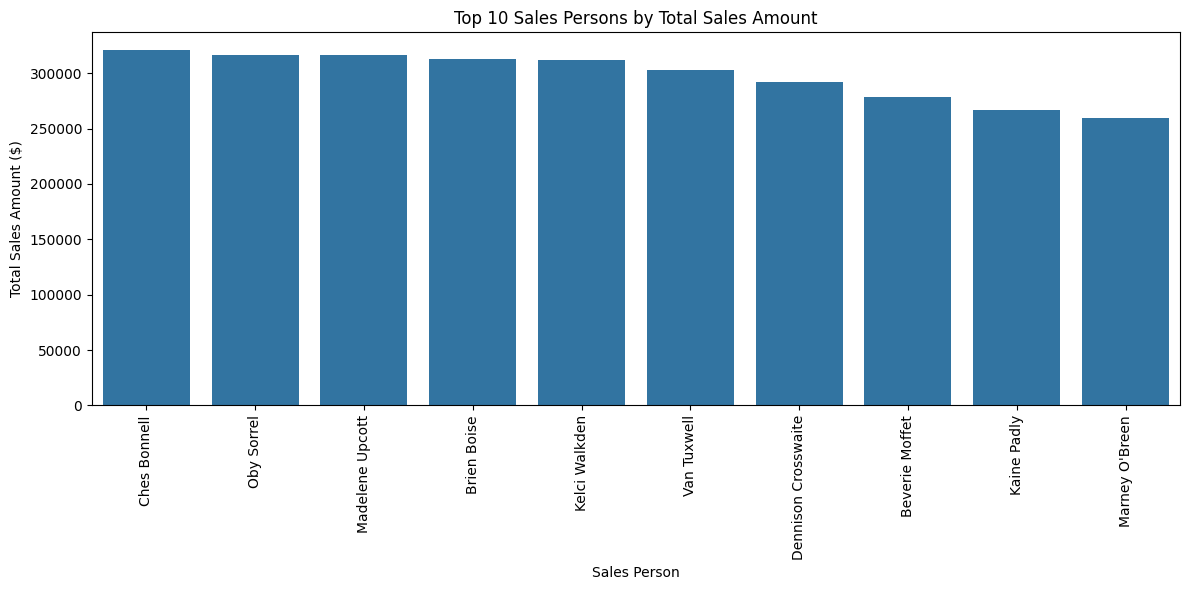

In [43]:
# Sales peformance by person
sales_person_performance = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

# Select top 10 sales persons
top_10_sales_person = sales_person_performance.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_person.index, y=top_10_sales_person.values)
plt.xticks(rotation=90)
plt.xlabel('Sales Person')
plt.ylabel('Total Sales Amount ($)')
plt.title('Top 10 Sales Persons by Total Sales Amount')
plt.tight_layout()
plt.show()

In [39]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract Year and Month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by Sales Person and YearMonth to get monthly sales
monthly_sales_person = df.groupby(['Sales Person', 'YearMonth'])['Amount'].sum().unstack(fill_value=0)

# Calculate the average monthly sales for each person
average_monthly_sales = monthly_sales_person.mean(axis=1).sort_values()

print("Average Monthly Sales Performance (Lowest to Highest):")
print(average_monthly_sales)

Average Monthly Sales Performance (Lowest to Highest):
Sales Person
Wilone O'Kielt         17315.375
Dotty Strutley         23828.000
Camilla Castle         24577.000
Mallorie Waber         25074.000
Andria Kimpton         25218.375
Husein Augar           25651.500
Rafaelita Blaksland    26280.625
Curtice Advani         27057.625
Jan Morforth           27458.375
Jehu Rudeforth         27622.000
Karlen McCaffrey       27986.875
Gigi Bohling           29083.250
Gunar Cockshoot        29810.375
Roddy Speechley        31382.750
Barr Faughny           32339.125
Marney O'Breen         32467.750
Kaine Padly            33311.250
Beverie Moffet         34865.250
Dennison Crosswaite    36458.625
Van Tuxwell            37893.625
Kelci Walkden          38963.750
Brien Boise            39102.000
Madelene Upcott        39512.375
Oby Sorrel             39580.625
Ches Bonnell           40112.625
dtype: float64


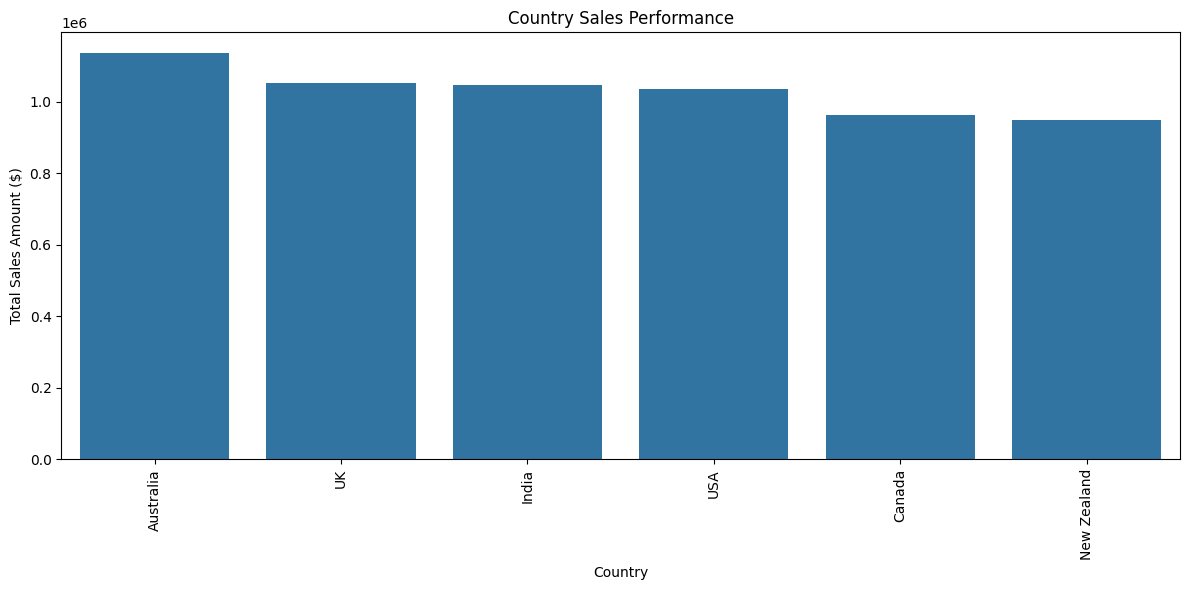

In [38]:
# Country sales
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Sales Amount ($)')
plt.title('Country Sales Performance')
plt.tight_layout()
plt.show()

In [40]:
# Produk sales by amount & box shipped
product_performance = df.groupby('Product').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).sort_values(by='Amount', ascending=False)

print("Product Performance (Sorted by Total Sales Amount):")
print(product_performance)

# You can also sort by Boxes Shipped to see which products have the highest volume
print("\nProduct Performance (Sorted by Total Boxes Shipped):")
print(product_performance.sort_values(by='Boxes Shipped', ascending=False))

Product Performance (Sorted by Total Sales Amount):
                        Amount  Boxes Shipped
Product                                      
Smooth Sliky Salty    349692.0           8810
50% Dark Bites        341712.0           9792
White Choc            329147.0           8240
Peanut Butter Cubes   324842.0           8304
Eclairs               312445.0           8757
99% Dark & Pure       299796.0           8127
85% Dark Bars         299229.0           7793
Organic Choco Syrup   294700.0           7749
Spicy Special Slims   293454.0           8685
Mint Chip Choco       283969.0           8207
Almond Choco          277536.0           6736
Manuka Honey Choco    275541.0           7781
Milk Bars             269248.0           8330
Raspberry Choco       264740.0           7115
After Nines           261331.0           8257
Fruit & Nut Bars      259147.0           7738
Drinking Coco         256655.0           8660
Orange Choco          256144.0           7732
Baker's Choco Chips   249613

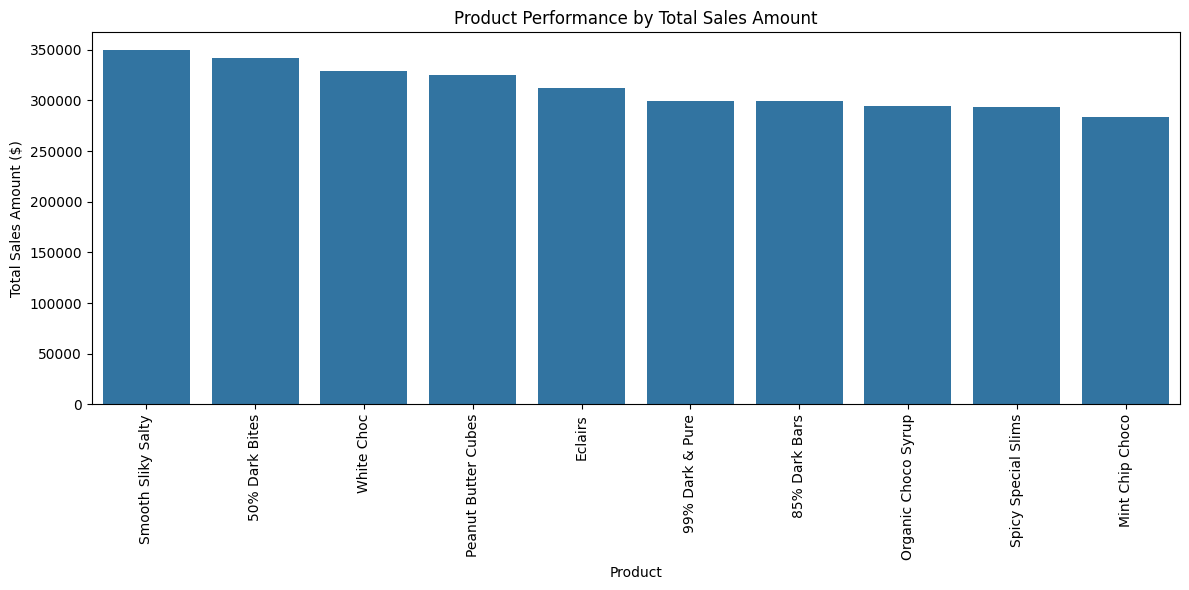

In [44]:
# Top sales product
product_10_performance = product_performance.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_10_performance.index, y=product_10_performance['Amount'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Total Sales Amount ($)')
plt.title('Product Performance by Total Sales Amount')
plt.tight_layout()
plt.show()

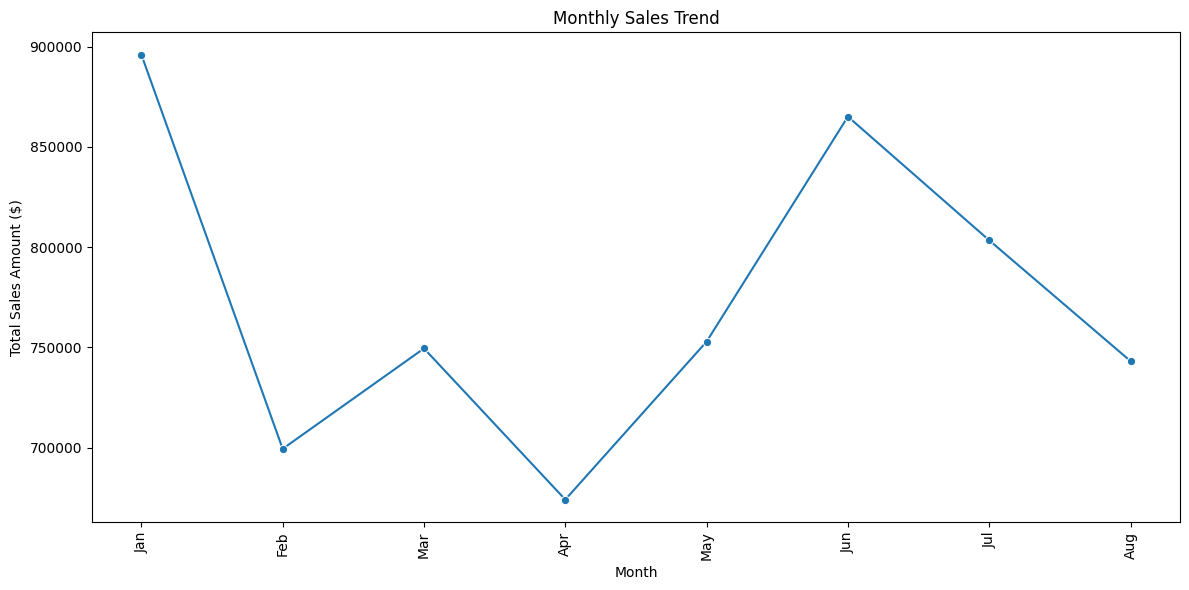

In [47]:
# Convert 'Date' to datetime objects if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month Name
df['Month_Name'] = df['Date'].dt.strftime('%b') # Use '%B' for full name, '%b' for abbreviated name

# Group by YearMonth and Month Name, and sum the Amount
# We group by YearMonth first to ensure correct sorting, then by Month_Name for the labels
monthly_sales_trend = df.groupby(['YearMonth_Plot', 'Month_Name'])['Amount'].sum().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Name', y='Amount', data=monthly_sales_trend, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()